In [7]:
import matplotlib.pyplot as plt
import csv
from pathlib import Path

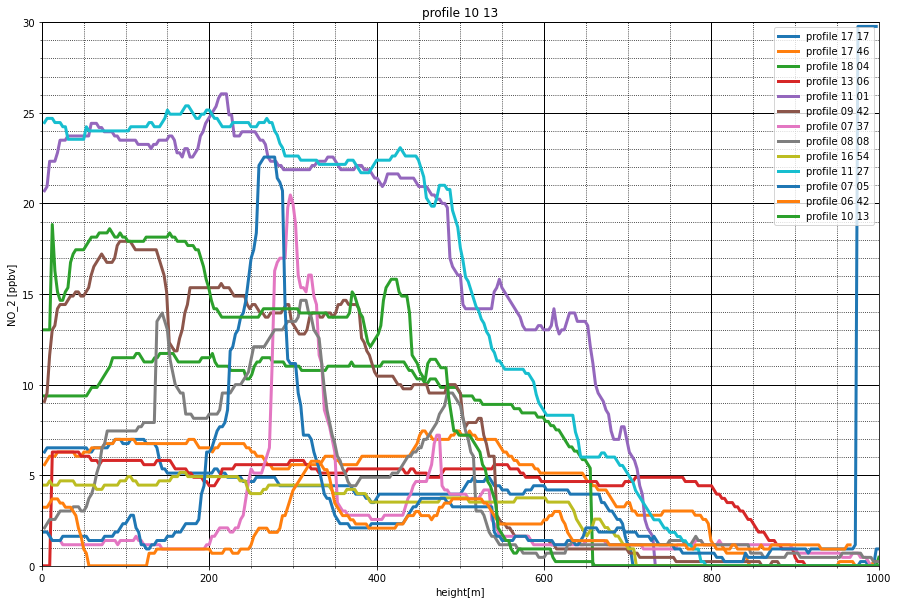

In [8]:
plt.figure(figsize=(15, 10))
for txt_path in Path(Path.cwd().parent, 
                     "data", "profiles_1", 
                     "csv").glob("*.csv"):
    with open(txt_path, "r") as csv_file:
        reader = csv.reader(csv_file)
        tup_coords: tuple[tuple[str]] = tuple(reader)
        plt.minorticks_on()
        plt.grid(which='major', color = 'k', linewidth = 1)
        plt.grid(which='minor', color = 'k', linestyle = ':')
        plt.xlim(0, 1000)
        plt.ylim(0, 30)
        plt.xlabel("height[m]")
        plt.ylabel("NO_2 [ppbv]")
        plt.title(txt_path.name.replace(".csv", "").replace("_", " "))
        plt.plot(tuple(float(x[0]) for x in tup_coords), 
                 tuple(float(x[1]) for x in tup_coords),
                 linewidth=3,
                 label=txt_path.name.replace(".csv", "").replace("_", " "))

plt.legend()
plt.show()